#**Netflix Dataset Analysis**





**Step 1: Import necessary libraries**

In [30]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

**Step 2: Load the dataset**

In [31]:
df = pd.read_excel('Netflix Dataset.csv.xlsx')

**Step 3: Display basic information**

In [32]:
print(df.head())
print(df.info())
print(df.describe())

  Show_Id Category     Title           Director  \
0      s1  TV Show      0.03                NaN   
1      s2    Movie  07:19:00  Jorge Michel Grau   
2      s3    Movie  23:59:00       Gilbert Chan   
3      s4    Movie         9        Shane Acker   
4      s5    Movie        21     Robert Luketic   

                                                Cast        Country  \
0  JoÃ£o Miguel, Bianca Comparato, Michel Gomes, ...         Brazil   
1  DemiÃ¡n Bichir, HÃ©ctor Bonilla, Oscar Serrano...         Mexico   
2  Tedd Chan, Stella Chung, Henley Hii, Lawrence ...      Singapore   
3  Elijah Wood, John C. Reilly, Jennifer Connelly...  United States   
4  Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...  United States   

        Release_Date Rating   Duration  \
0    August 14, 2020  TV-MA  4 Seasons   
1  December 23, 2016  TV-MA     93 min   
2  December 20, 2018      R     78 min   
3  November 16, 2017  PG-13     80 min   
4    January 1, 2020  PG-13    123 min   

             

**Step-4: Display missing values**

In [33]:
print('Missing Values in Each Column:')
print(df.isnull().sum())

Missing Values in Each Column:
Show_Id            0
Category           0
Title              0
Director        2388
Cast             718
Country          507
Release_Date      10
Rating             7
Duration           0
Type               0
Description        0
dtype: int64


**Step 5: Fill missing directors, cast, and country with 'Unknown'**

In [40]:
df['Director'].fillna('Unknown', inplace=True)
df['Cast'].fillna('Unknown', inplace=True)
df['Country'].fillna('Unknown', inplace=True)


# Fill missing release date and rating with mode
df['Release_Date'].fillna(df['Release_Date'].mode()[0], inplace=True)
df['Rating'].fillna(df['Rating'].mode()[0], inplace=True)


print('\nAfter Filling Missing Values:')
print(df.isnull().sum())


After Filling Missing Values:
Show_Id         0
Category        0
Title           0
Director        0
Cast            0
Country         0
Release_Date    0
Rating          0
Duration        0
Type            0
Description     0
Year            0
Main_Genre      0
dtype: int64


/tmp/ipython-input-2420521748.py:1: FutureWarning:

A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.



/tmp/ipython-input-2420521748.py:2: FutureWarning:

A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or d

**Step:6 Movies vs TV Shows**

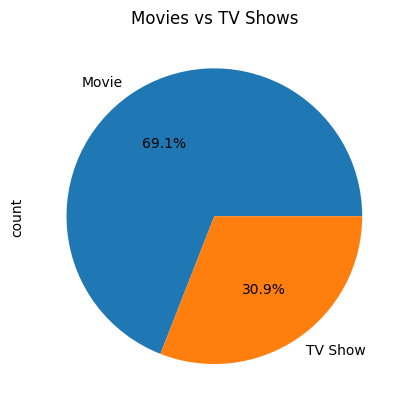

In [35]:
df['Category'].value_counts().plot(kind='pie', autopct='%1.1f%%', title='Movies vs TV Shows')
plt.show()

**Step-7: Content over years**

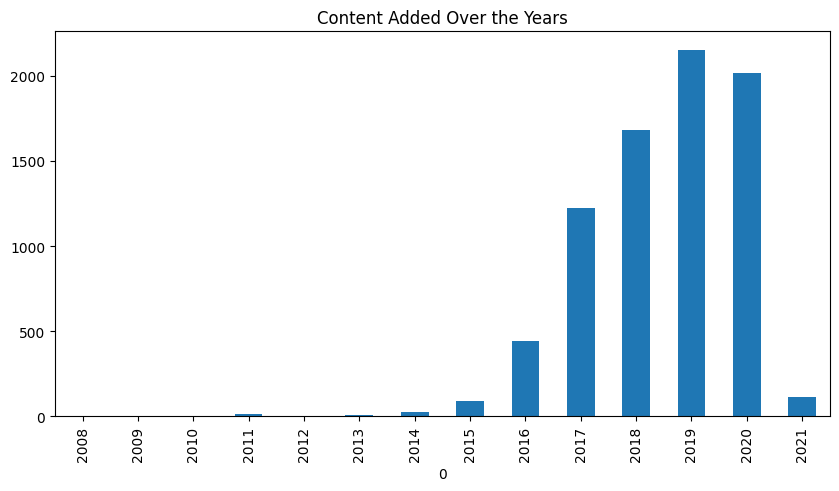

In [36]:
plt.figure(figsize=(10,5))
df['Release_Date'].astype(str).str.extract('(\\d{4})').dropna()[0].value_counts().sort_index().plot(kind='bar', title='Content Added Over the Years')
plt.show()

**Step-8: Top Genres**

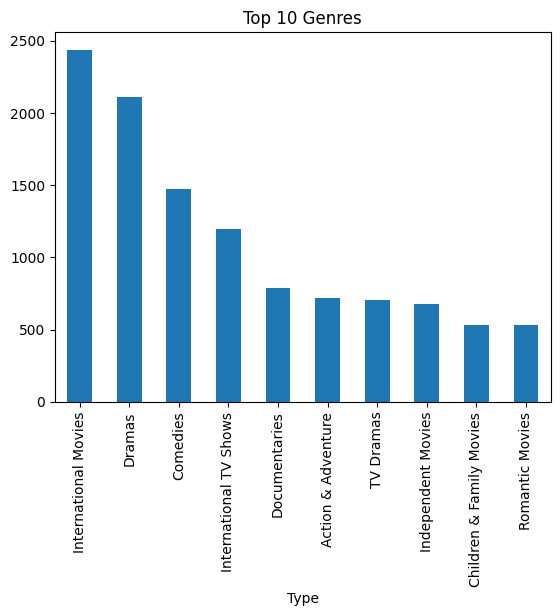

In [37]:
df['Type'].dropna().str.split(',').explode().str.strip().value_counts().head(10).plot(kind='bar', title='Top 10 Genres')
plt.show()

**Step-9: Top Countries**

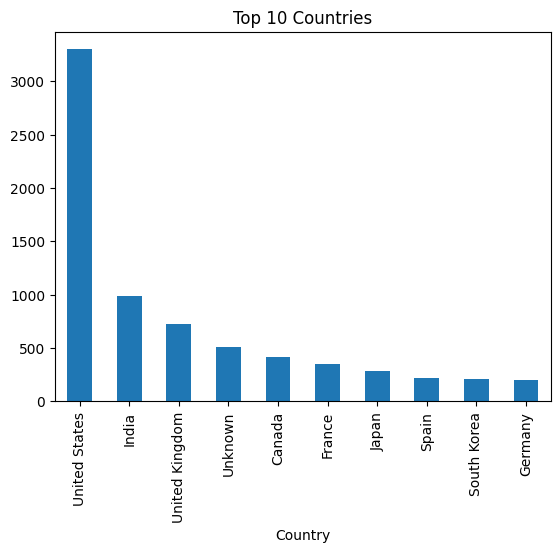

Netflix Dataset Analysis Completed with Missing Values Handled!


In [38]:
df['Country'].dropna().str.split(',').explode().str.strip().value_counts().head(10).plot(kind='bar', title='Top 10 Countries')
plt.show()


print('Netflix Dataset Analysis Completed with Missing Values Handled!')

**Step-10: Final Anaylsis**

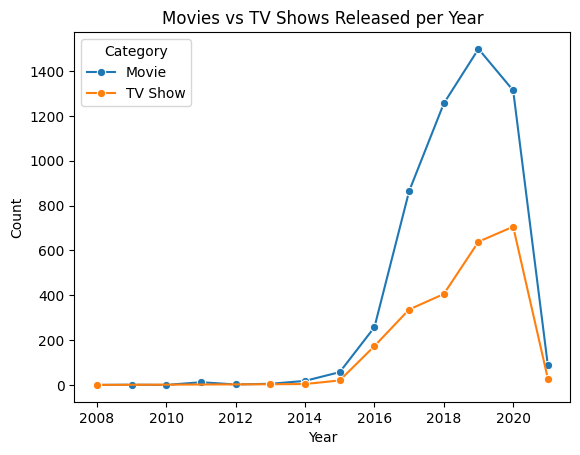

/tmp/ipython-input-3846662925.py:21: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




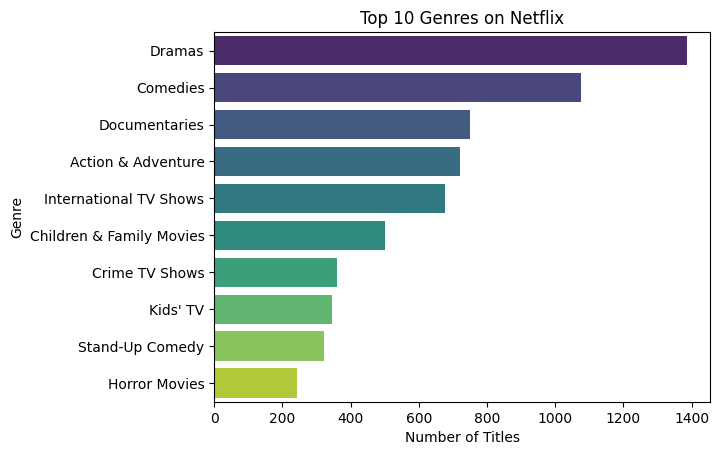

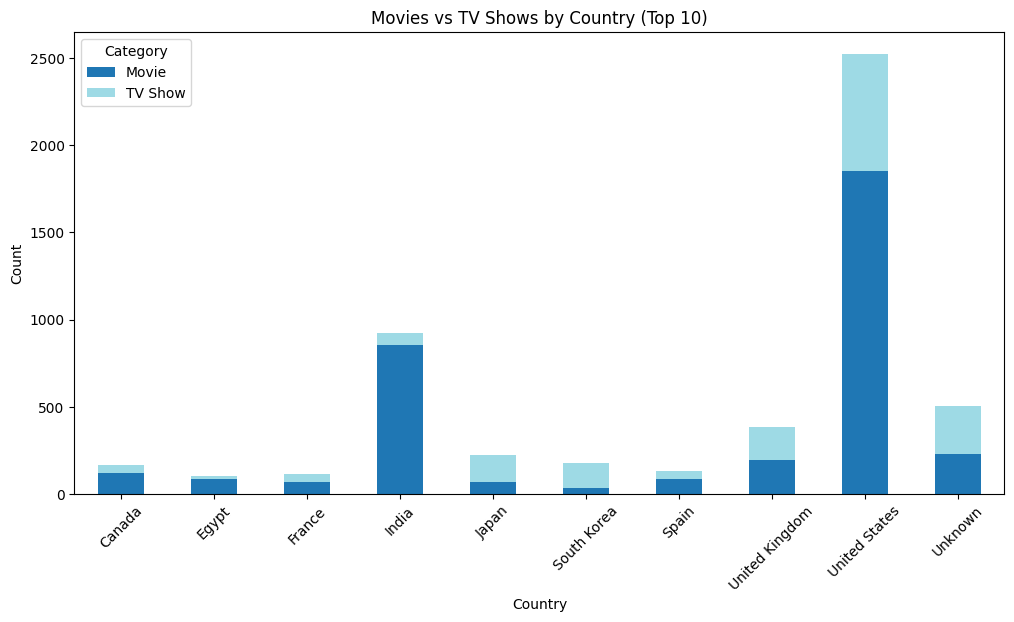

Unique Country Names:
['Brazil' 'Mexico' 'Singapore' 'United States' 'Turkey' 'Egypt' 'India'
 'Poland, United States' 'Thailand' 'Nigeria' 'Unknown'
 'Norway, Iceland, United States' 'United Kingdom' 'Japan' 'South Korea'
 'Italy' 'Canada' 'Indonesia' 'Romania' 'Spain' 'Iceland'
 'South Africa, Nigeria' 'France' 'United States, South Africa'
 'Portugal, Spain' 'Hong Kong, China, Singapore' 'United States, Germany'
 'South Africa, China, United States' 'Argentina'
 'United States, France, Serbia' 'Germany' 'Denmark, France, Poland'
 'Poland' 'Kenya' 'New Zealand, United Kingdom' 'Pakistan' 'Australia'
 'Australia, United States' 'Mexico, United States' 'United States, China'
 'China, Hong Kong' 'Taiwan' 'United States, United Kingdom'
 'France, South Korea, Japan' 'United States, Canada'
 'United Kingdom, United States' 'Netherlands, Denmark, South Africa'
 'Canada, United States' 'Denmark' 'Hong Kong'
 'France, Netherlands, Singapore' 'China' 'Philippines'
 'United Kingdom, Spain, Uni

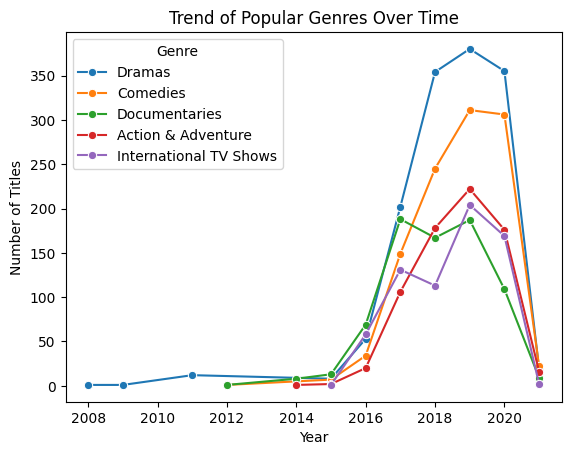

In [39]:
# Extract Year from Release_Date, coercing errors to NaT
df['Year'] = pd.to_datetime(df['Release_Date'], errors='coerce').dt.year

# Drop rows where Year is NaT
df.dropna(subset=['Year'], inplace=True)

# Extract Main Genre from Type
df['Main_Genre'] = df['Type'].str.split(',').str[0]

# 1. Line Chart – Movies vs TV Shows per Year
content_trend = df.groupby(['Year', 'Category']).size().reset_index(name='Count')
sns.lineplot(data=content_trend, x='Year', y='Count', hue='Category', marker='o')
plt.title('Movies vs TV Shows Released per Year')
plt.xlabel('Year')
plt.ylabel('Count')
plt.show()


# 2. Bar Chart – Top 10 Genres
top_genres = df['Main_Genre'].value_counts().head(10)
sns.barplot(x=top_genres.values, y=top_genres.index, palette='viridis')
plt.title('Top 10 Genres on Netflix')
plt.xlabel('Number of Titles')
plt.ylabel('Genre')
plt.show()


# 3. Stacked Bar Chart – Movies vs TV Shows per Country (Top 10)
top_countries = df['Country'].value_counts().head(10).index
stacked = df[df['Country'].isin(top_countries)].groupby(['Country', 'Category']).size().unstack(fill_value=0)
fig, ax = plt.subplots(figsize=(12,6))
stacked.plot(kind='bar', stacked=True, ax=ax, colormap='tab20')
plt.title('Movies vs TV Shows by Country (Top 10)')
plt.xlabel('Country')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()


# 4. Choropleth Map – Country-wise Content
country_counts = df['Country'].value_counts().reset_index()
country_counts.columns = ['Country', 'Count']

# Display unique country names to identify the issue
print("Unique Country Names:")
print(df['Country'].unique())

fig = px.choropleth(country_counts, locations='Country', locationmode='country names', color='Count', hover_name='Country', color_continuous_scale='viridis', title='Netflix Content by Country')
fig.show()


# 5. Trend Line – Popular Genres Over Time
popular_genres = df['Main_Genre'].value_counts().head(5).index
genre_trends = df[df['Main_Genre'].isin(popular_genres)].groupby(['Year','Main_Genre']).size().reset_index(name='Count')
sns.lineplot(data=genre_trends, x='Year', y='Count', hue='Main_Genre', marker='o')
plt.title('Trend of Popular Genres Over Time')
plt.xlabel('Year')
plt.ylabel('Number of Titles')
plt.legend(title='Genre')
plt.show()